## Dependencies

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

## ROC curve plotting function

In [54]:
def plot_roc_curve(fpr, tpr, roc_auc):
  plt.figure()
  lw = 2 #linewidth
  plt.figure(figsize = (6,6))
  plt.plot(fpr, tpr, color = 'darkorange', #(x,y) is fpr, tpr. 
           lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0,1], [0,1], color = 'navy', lw=lw, linestyle = '--') #
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.show()

## Binary Class with generated data

In [55]:
mu_0 = 0
mu_1 = 2
sigma = 1
np.random.seed(0)

n1_train = 100
X1_train = np.random.normal(mu_1, sigma, n1_train) #100 random values around 2, with 1 std dev

n1_test = 1000
X1_test = np.random.normal(mu_1, sigma, n1_test)

X1_train.shape

(100,)

Create separately another distribution around 0, for the 2nd X predictor

In [56]:
#ratio for x_0
ratio_r1 = 1
n0_train_r1 = n1_train * ratio_r1
X0_train_r1 = np.random.normal(mu_0, sigma, n0_train_r1) #100, shape

n0_test_r1 = n1_test * ratio_r1
X0_test_r1 = np.random.normal(mu_0, sigma, n0_test_r1)

## np.r_ concatenates any number of array slices along row_axis
X_train_r1 = np.r_[X1_train, X0_train_r1].reshape(-1,1)
X_test_r1 = np.r_[X1_test, X0_test_r1].reshape(-1, 1)

## [0]*10 will produce [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_train_r1 = np.r_[[1]*n1_train, [0]*n0_train_r1] #
y_test_r1 = np.r_[[1]*n1_test, [0]*n0_test_r1]


y_train_r1.shape

(200,)

### Logistic Regression Model

In [57]:
lr_r1 = LogisticRegression(penalty = 'none').fit(X_train_r1, y_train_r1)

Text(0.5, 1.0, '2-class Precision-Recall curve')

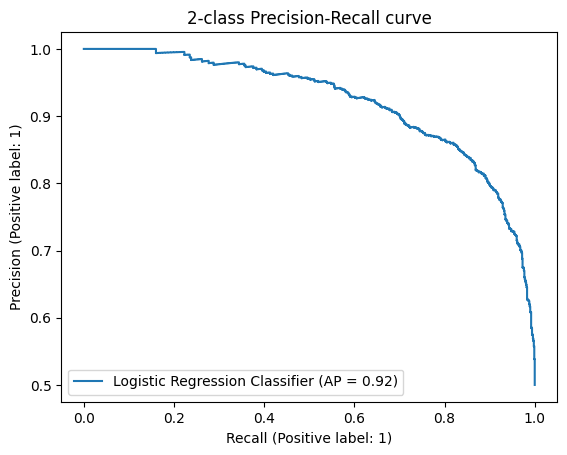

In [58]:
display = PrecisionRecallDisplay.from_estimator(lr_r1, X_test_r1, y_test_r1, name = 'Logistic Regression Classifier')
  #precision is tp/(tp_fp) (not label negative samples as positive) and recall is tp/(tp_fn) (find positive samples)
display.ax_.set_title("2-class Precision-Recall curve")

ROC AUC Curve

<Figure size 640x480 with 0 Axes>

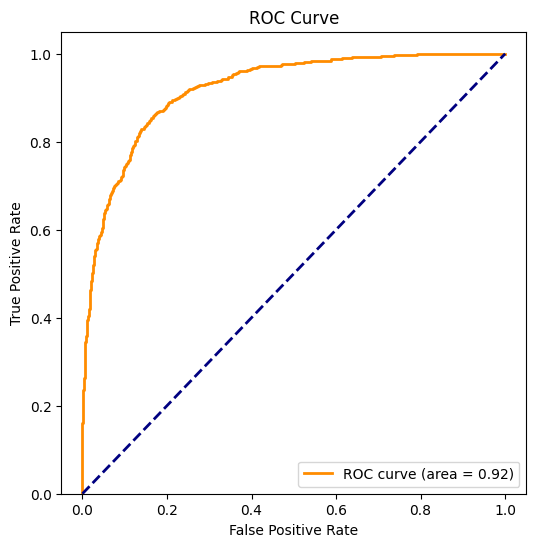

In [59]:
y_score_r1_lr = lr_r1.predict_proba(X_test_r1)[:, 1] #2000 predictions
fpr, tpr, thresholds = roc_curve(y_test_r1, y_score_r1_lr) #get fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc)

### Linear Discriminant Analysis

In [62]:
lda_r1 = LinearDiscriminantAnalysis().fit(X_train_r1, y_train_r1)

Text(0.5, 1.0, 'Precision-Recall curve')

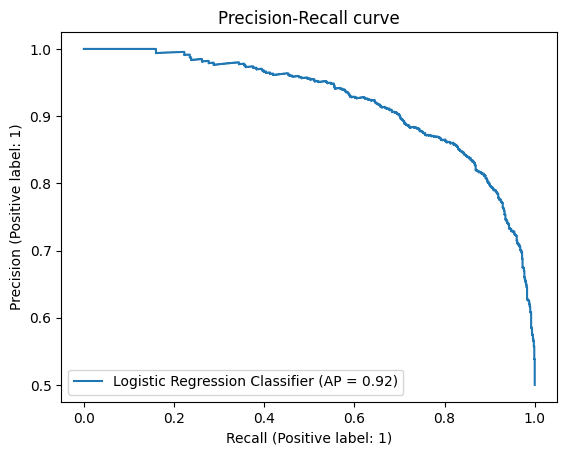

In [64]:
display = PrecisionRecallDisplay.from_estimator(lda_r1, X_test_r1, y_test_r1, name = 'Logistic Regression Classifier')
  #precision is tp/(tp_fp) (not label negative samples as positive) and recall is tp/(tp_fn) (find positive samples)
display.ax_.set_title("Precision-Recall curve")

ROC AUC Curve

<Figure size 640x480 with 0 Axes>

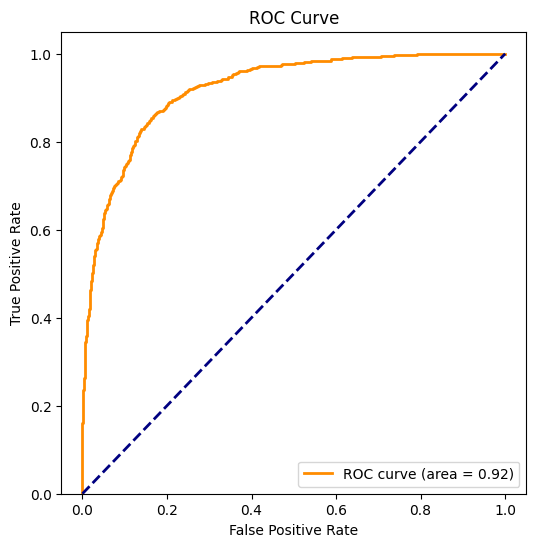

In [65]:
y_score_r1_lr = lda_r1.predict_proba(X_test_r1)[:, 1] #2000 predictions
fpr, tpr, thresholds = roc_curve(y_test_r1, y_score_r1_lr) #get fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc)

## With Ratio = 20

In [94]:
#ratio for x_0
ratio_r1 = 20
n0_train_r1 = n1_train * ratio_r1
X0_train_r1 = np.random.normal(mu_0, sigma, n0_train_r1) #100, shape

n0_test_r1 = n1_test * ratio_r1
X0_test_r1 = np.random.normal(mu_0, sigma, n0_test_r1)

## np.r_ concatenates any number of array slices along row_axis
X_train_r1 = np.r_[X1_train, X0_train_r1].reshape(-1,1)
X_test_r1 = np.r_[X1_test, X0_test_r1].reshape(-1, 1)

## [0]*10 will produce [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_train_r1 = np.r_[[1]*n1_train, [0]*n0_train_r1] #
y_test_r1 = np.r_[[1]*n1_test, [0]*n0_test_r1]


y_train_r1.shape

(2100,)

### Logistic Regression

In [95]:
lr_r1 = LogisticRegression(penalty = 'none').fit(X_train_r1, y_train_r1)

Text(0.5, 1.0, '2-class Precision-Recall curve')

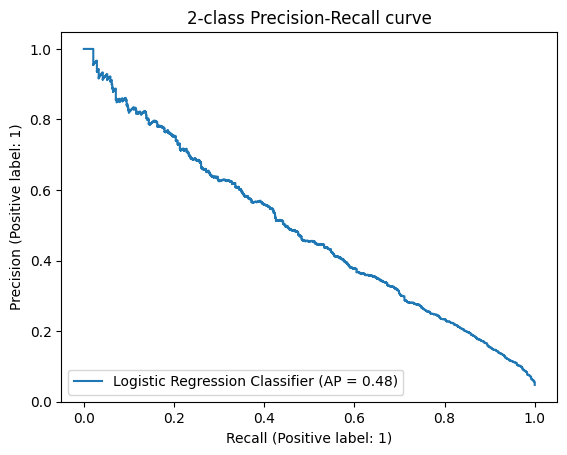

In [96]:
display = PrecisionRecallDisplay.from_estimator(lr_r1, X_test_r1, y_test_r1, name = 'Logistic Regression Classifier')
  #precision is tp/(tp_fp) (not label negative samples as positive) and recall is tp/(tp_fn) (find positive samples)
display.ax_.set_title("2-class Precision-Recall curve")

ROC AUC Curve

<Figure size 640x480 with 0 Axes>

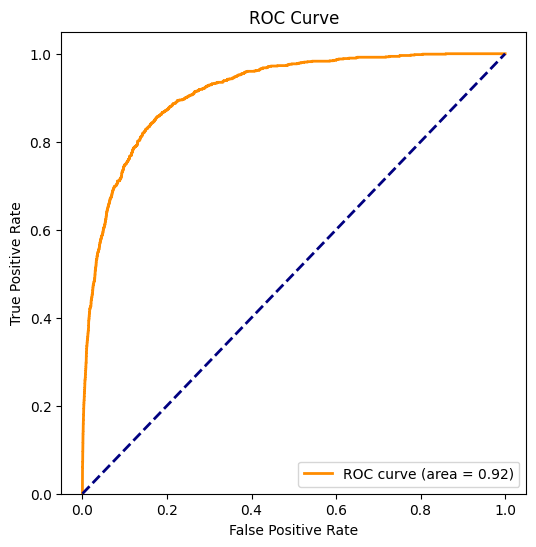

In [97]:
y_score_r1_lr = lr_r1.predict_proba(X_test_r1)[:, 1] #2000 predictions
fpr, tpr, thresholds = roc_curve(y_test_r1, y_score_r1_lr) #get fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc)

### Linear Discriminant Analysis

In [98]:
lda_r1 = LinearDiscriminantAnalysis().fit(X_train_r1, y_train_r1)

Text(0.5, 1.0, 'Precision-Recall curve')

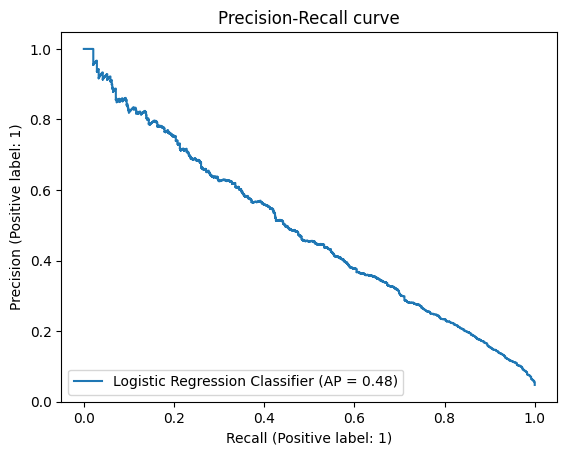

In [99]:
display = PrecisionRecallDisplay.from_estimator(lda_r1, X_test_r1, y_test_r1, name = 'Logistic Regression Classifier')
  #precision is tp/(tp_fp) (not label negative samples as positive) and recall is tp/(tp_fn) (find positive samples)
display.ax_.set_title("Precision-Recall curve")

ROC AUC Curve

<Figure size 640x480 with 0 Axes>

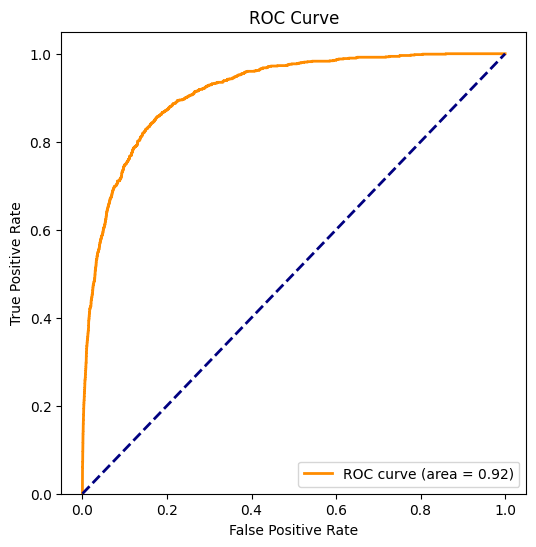

In [100]:
y_score_r1_lr = lda_r1.predict_proba(X_test_r1)[:, 1] #2000 predictions
fpr, tpr, thresholds = roc_curve(y_test_r1, y_score_r1_lr) #get fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc)

## Conclusion on class imbalance
As we can see, when we introduce a severe class imbalance, the precision recall rate is severely hindered. The Precision recall curve is concerned with the minority class - which is why we see severe changes

But in the grand scheme of the whole model, the ROC curve is barely affected since it concerns itself with both classes

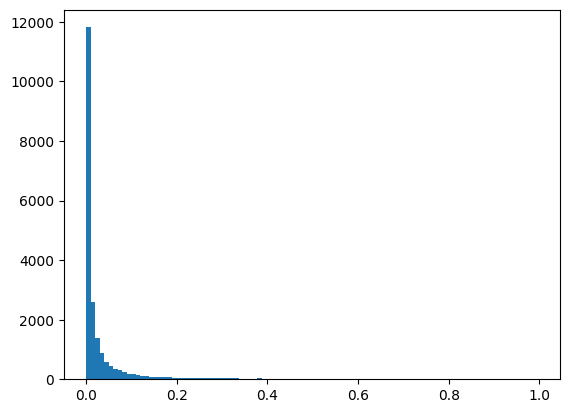

In [102]:
plt.hist(lda_r1.predict_proba(X_test_r1)[:, 1], bins=100)
plt.show()

As we can see the large majority of values are on the low end ( or being predicted 0), hence why the ROC curve is not really affected